In [1]:
import pymc3 as pm

In [285]:
import matplotlib.pyplot as plt
import theano.tensor as tt
import numpy as np
import pandas as pd
import arviz as az

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [gamma, beta]
Sampling 2 chains, 0 divergences: 100%|██████████| 11000/11000 [02:43<00:00, 67.17draws/s] 
The estimated number of effective samples is smaller than 200 for some parameters.


<MultiTrace: 2 chains, 500 iterations, 3 variables>


/opt/anaconda3/lib/python3.8/site-packages/arviz/plots/traceplot.py:191: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


ValueError: cannot convert float NaN to integer

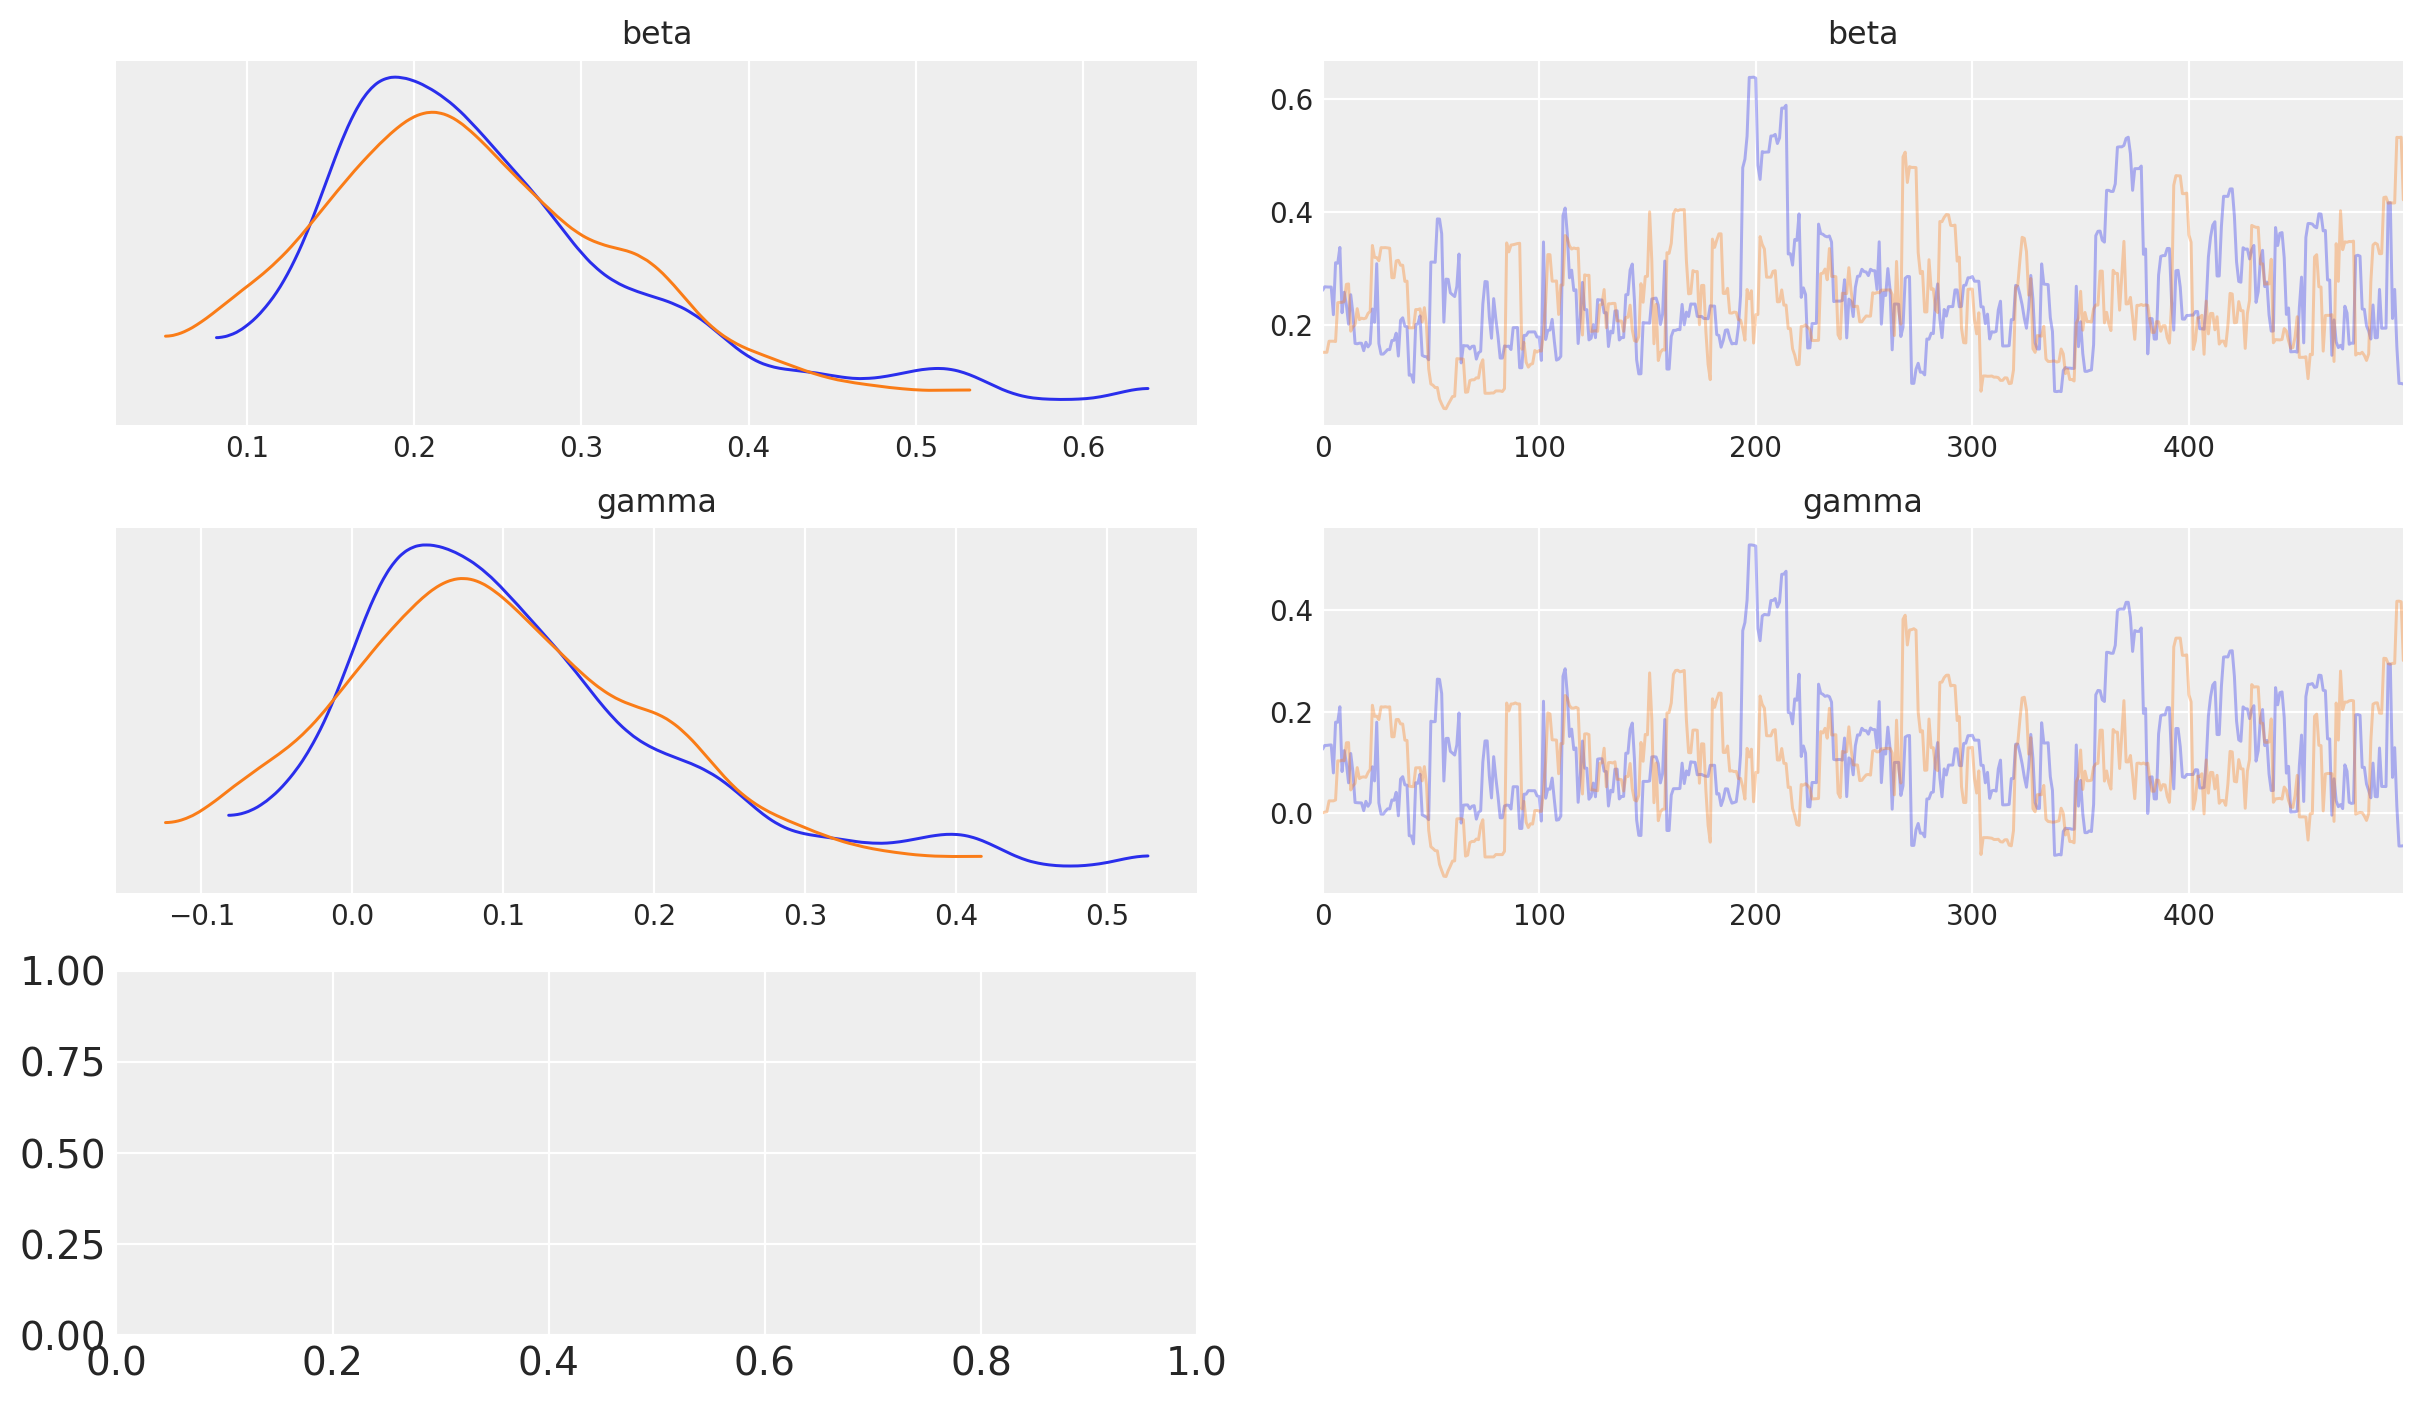

In [287]:
beta, gamma = 0.21, 0.07

days = 50
time = np.arange(0, days, 1)
data = beta / (beta-gamma) * (np.exp(time * (beta-gamma)) -1 ) + 1

noisesd = 0
data += np.random.normal(0,noisesd,size=(days,))

def smodel(beta,gamma):
    if beta==gamma:
        return time
    s = beta/((beta-gamma))*(np.exp(time*(beta-gamma))-1)+1
    return s

with pm.Model() as basic_model:

    # Priors for unknown model parameters
    beta = pm.Normal("beta", mu=.2, sigma=1)
    gamma = pm.Normal("gamma", mu=0.1, sigma=1)

    # Expected value of outcome
    mu = pm.Deterministic('mu', smodel(beta,gamma))

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=100, observed=data)
    trace = pm.sample(init='adapt_diag', tune=5000)
    print(trace)
    az.plot_trace(trace)
    plt.show()
    az.plot_posterior(trace, var_names=['beta', 'gamma'])
    plt.show()
    az.plot_pair(trace, marginals=True, var_names=['beta', 'gamma'])
    plt.show()

Text(0.5, 0, 'time')

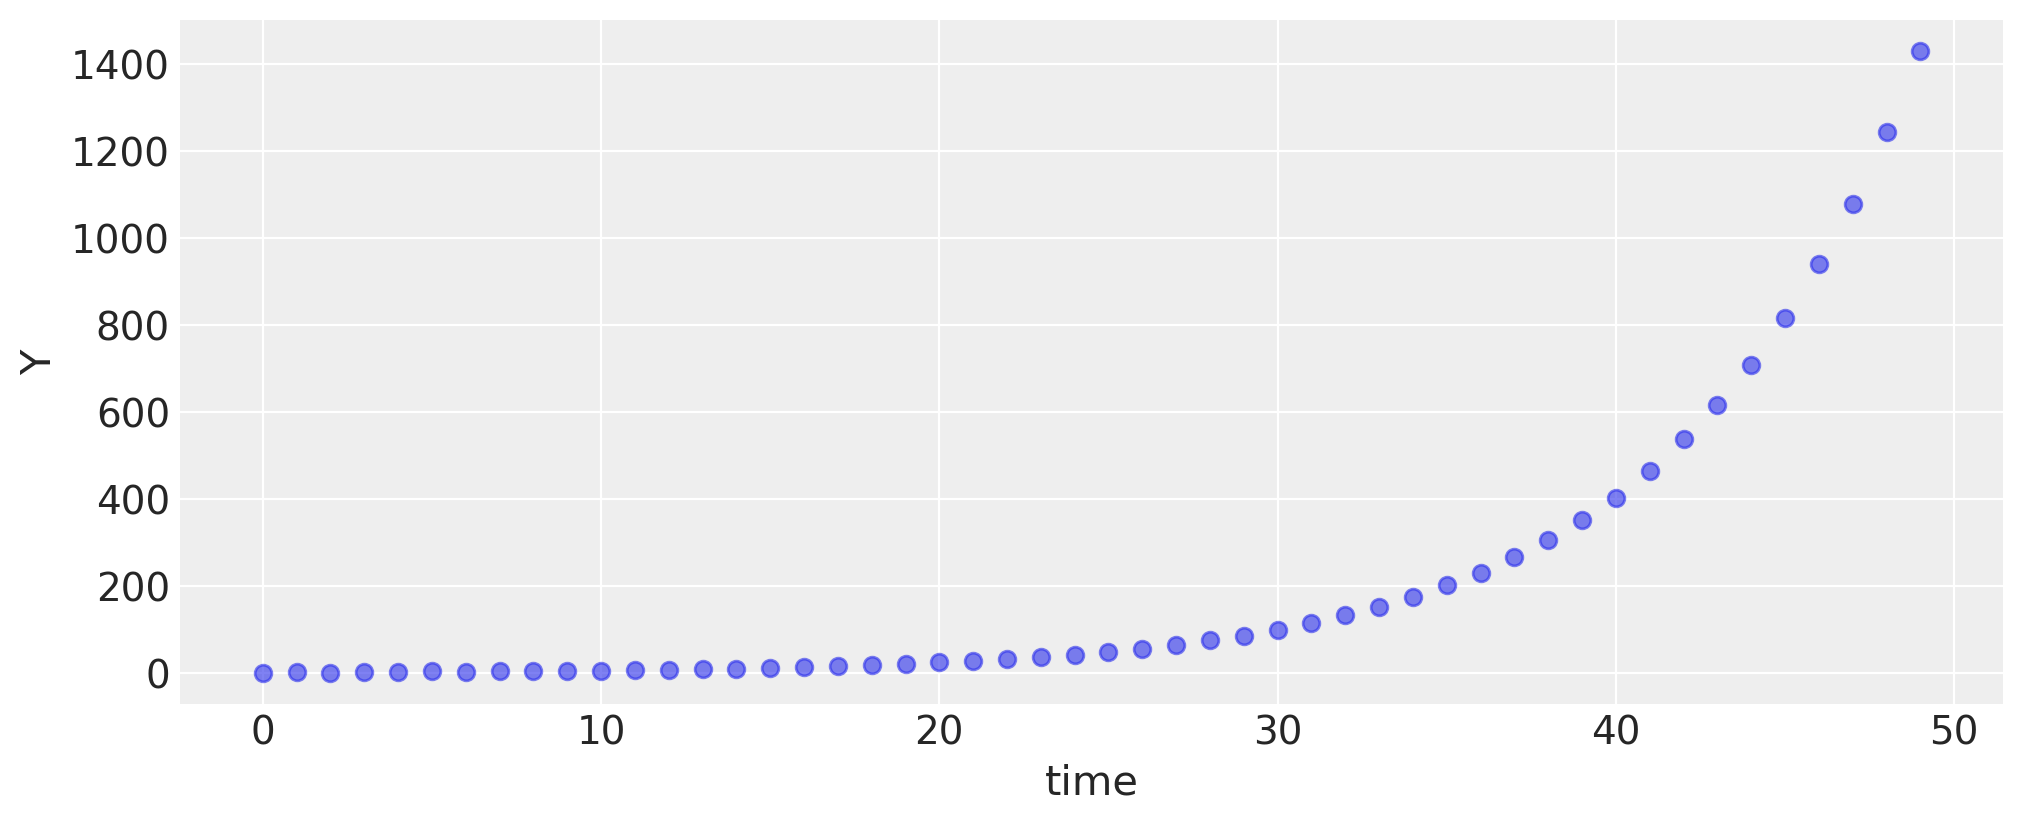

In [266]:
# True parameter values
beta, gamma = 0.21, 0.07

# Size of dataset
days = 50

# Predictor variable
time = np.arange(0,days,1)

# Simulate outcome variable
data = []
for t in time:
    data.append((beta/((beta-gamma))*(np.exp(t*(beta-gamma))-1)+1) + np.random.normal(0,1))

fig, axes = plt.subplots(1, 1, sharex=True, figsize=(10, 4))
axes.scatter(time, data, alpha=0.6)
axes.set_ylabel("Y")
axes.set_xlabel("time")


In [284]:
basic_model = pm.Model()

def smodel(beta,gamma):
    if beta==gamma:
        return time
    s = beta/((beta-gamma))*(np.exp(time*(beta-gamma))-1)+1
    return s

with basic_model:

    # Priors for unknown model parameters
    beta = pm.Normal("beta", mu=1, sigma=10)
    gamma = pm.Normal("gamma", mu=0.07, sigma=10)

    
    # Expected value of outcome
    #smodel_pm = pm.Deterministic('smodel', smodel(beta,gamma))
    y_obs = pm.Normal('obs', mu=np.log(smodel(beta,gamma)), sigma=1,observed=data)
    #observed = pm.Normal('obs', mu=smodel(beta,gamma), sigma=1,observed=data)
    # Using Metropolis Hastings Sampling
    #step = pm.Metropolis()
    
    # Draw the specified number of samples
    trace = pm.sample()#step=pm.Metropolis())
    


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [gamma, beta]
Sampling 2 chains, 0 divergences:   5%|▌         | 103/2000 [00:03<01:10, 26.86draws/s]


RuntimeError: Chain 0 failed.

In [282]:
az.summary(trace)

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
beta,0.008,0.002,0.006,0.010,0.001,0.001,3.0,3.0,2.0,9.0,2.42
gamma,-11.302,0.005,-11.307,-11.297,0.003,0.003,2.0,2.0,2.0,3.0,2.45


In [272]:
map_estimate = pm.find_MAP(model=basic_model)
map_estimate

logp = -6.443, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 576.38it/s]


{'beta': array(1.), 'gamma': array(0.07)}

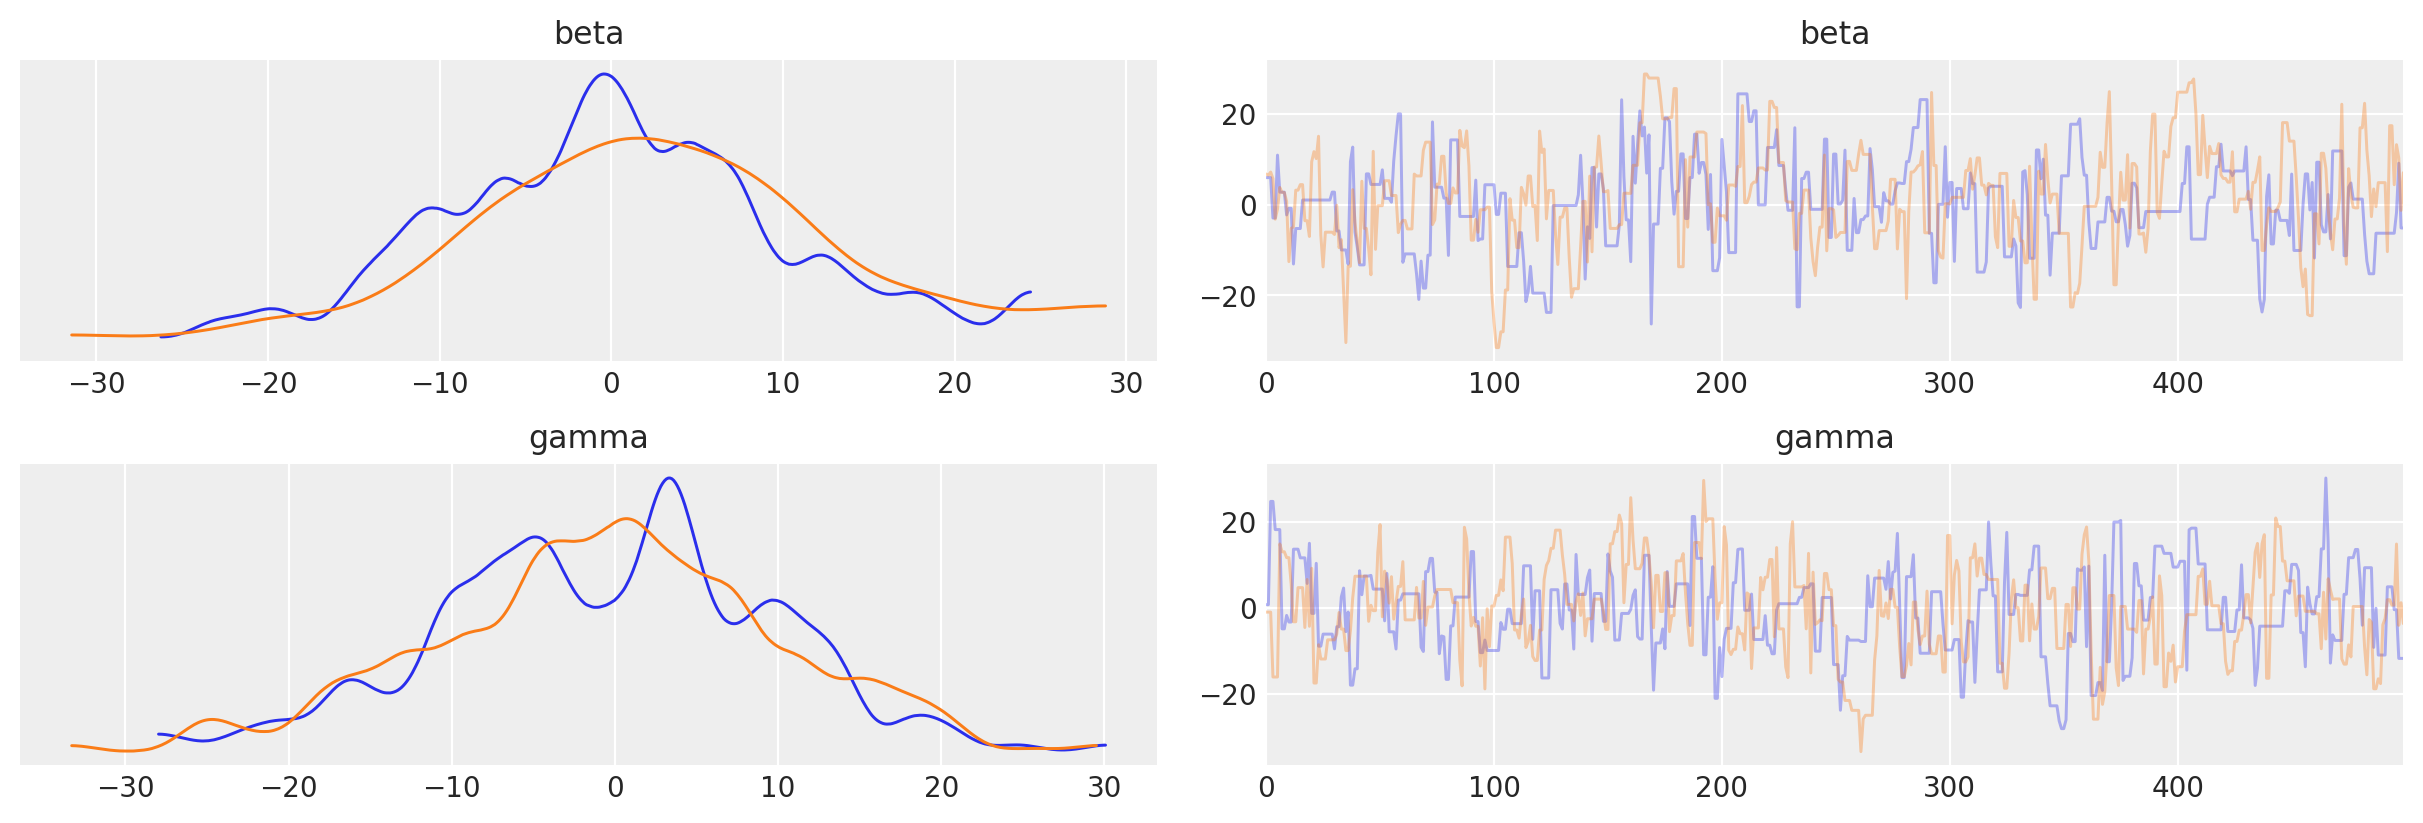

In [273]:
with basic_model:
    az.plot_trace(trace);

In [39]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

Text(0.5, 0, 'time')

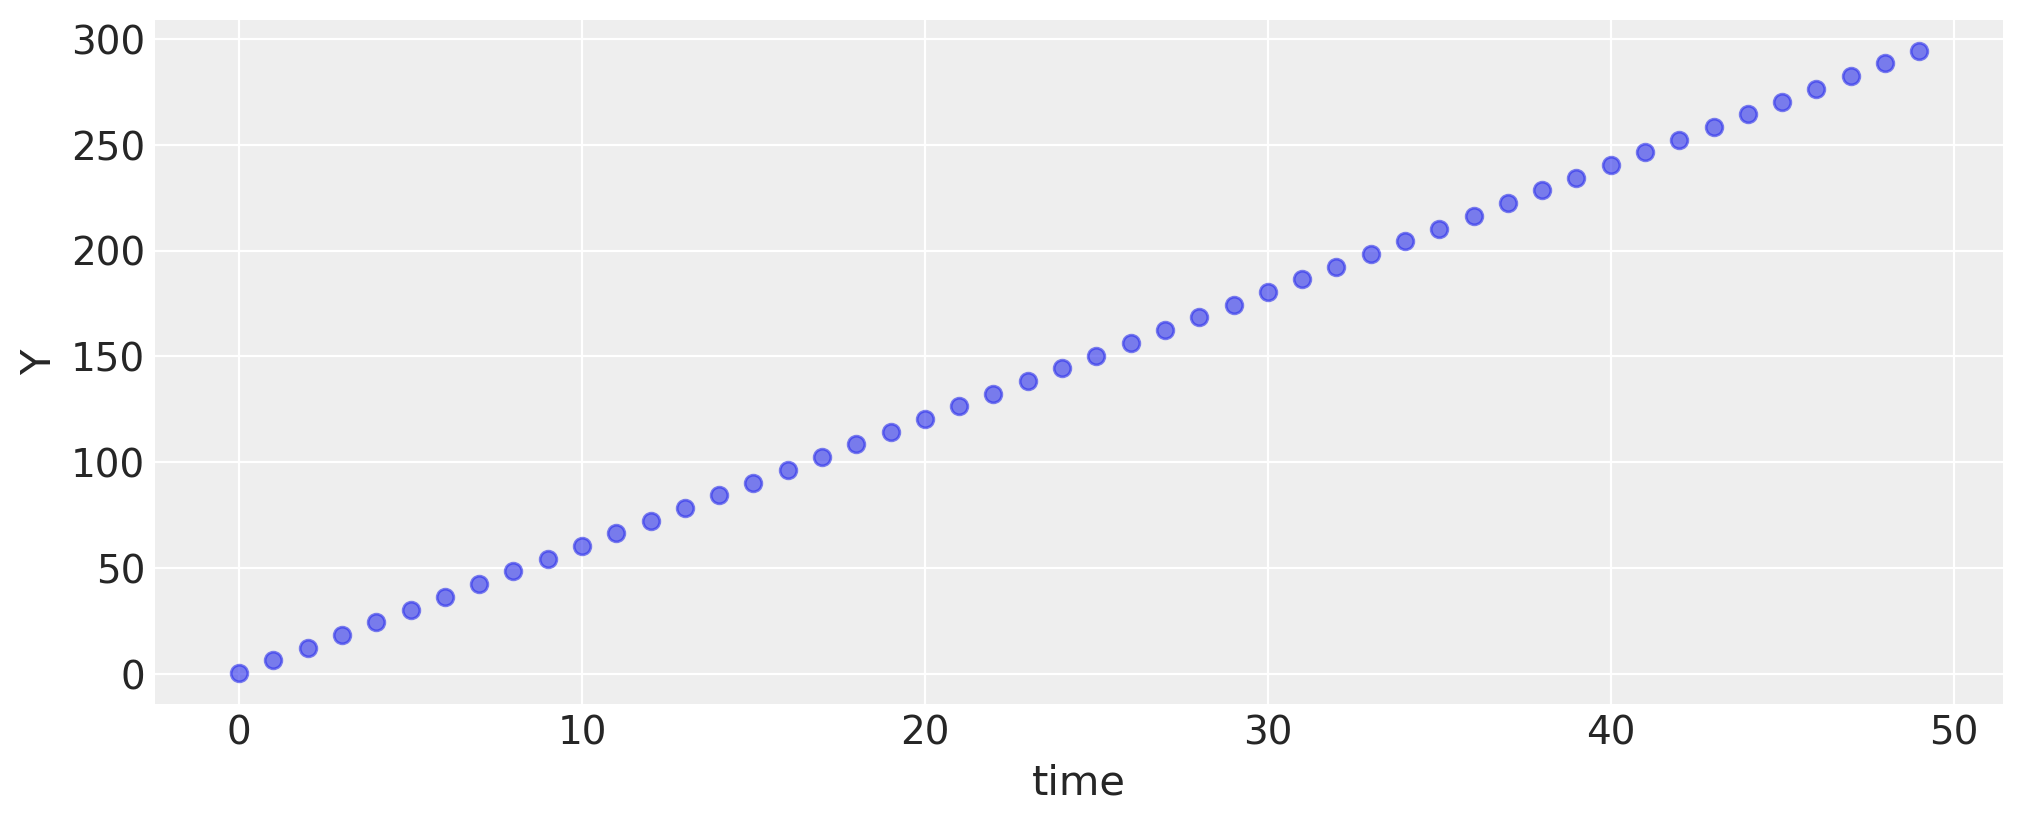

In [192]:

# True parameter values
alpha = 4
beta = 6

# Size of dataset
size = 50

# Predictor variable
time = np.arange(0,50,1)

# Simulate outcome variable
Y = alpha/(alpha+beta)+beta*time

fig, axes = plt.subplots(1, 1, sharex=True, figsize=(10, 4))
axes.scatter(time, Y, alpha=0.6)
axes.set_ylabel("Y")
axes.set_xlabel("time")

In [195]:
basic_model = pm.Model()

def expect(alpha,beta):
    return alpha/(alpha+beta)+beta*time


with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10)

    # Expected value of outcome
    #mu = alpha + beta * time 

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=expect(alpha,beta), sigma=1, observed=Y)
    
    trace = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta, alpha]
Sampling 2 chains, 53 divergences: 100%|██████████| 2000/2000 [00:09<00:00, 200.46draws/s]
There were 45 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.19130930313068872, but should be close to 0.8. Try to increase the number of tuning steps.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [196]:
az.summary(trace)

/opt/anaconda3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:87: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
alpha,2.813,4.887,-0.577,12.304,2.407,1.840,4.0,4.0,3.0,22.0,1.84
beta,3.264,2.736,0.515,6.014,1.919,1.621,2.0,2.0,3.0,11.0,2.23


In [194]:
map_estimate = pm.find_MAP(model=basic_model)
map_estimate

logp = nan, ||grad|| = 0: 100%|██████████| 2/2 [00:00<00:00, 85.68it/s]


{'alpha': array(0.), 'beta': array(0.)}